<a href="https://colab.research.google.com/github/HJoonKwon/ml_fundamentals/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustring Algorithm 
- An unsupervised learning algorithm (no dependent variables, only independent ones)

### What does it do?
- Segment the data points into K number of clusters


### How does it work?
1. Initially randomly select K centroids and each centroid form a cluster.
2. Assign all the data points to the closest clusters
3. Update the centroids to the mean of the assigned data points. 
4. Iterate from 2-4 until the maximum number of iterations is reached or the centroids converge. 

In [6]:
import numpy as np 
import seaborn as sns
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 

### 1) Create the dataset
- We do not need labels, but let us define ```y_train``` to evaluate the algorithm later.

In [2]:
X_train, y_train = make_blobs(n_samples=100, centers=5, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_train[0])
print(y_train[0])

(100, 2)
(100,)
[-6.2927701  -4.68965397]
2


### 2) Preprocess the data

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### 3) Visualize the data 

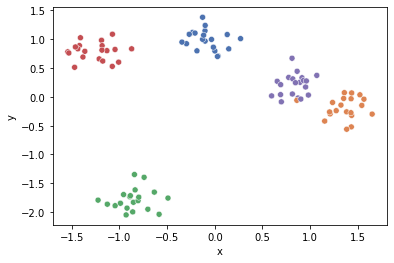

In [4]:
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=y_train,
                palette='deep',
                legend=None)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 4) Define helper functions 

In [5]:
def euclidean(point, centroids):
  '''Returns Euclidean distances between a point and centroids'''
  return np.linalg.norm(point-centroids, axis=1)

### 5) Implementation 

In [60]:
class KMeans:
  def __init__(self, n_clusters=8, max_iter=300):
    self.n_clusters = n_clusters 
    self.max_iter = max_iter 
    self.centroids = np.zeros((self.n_clusters, 2))
    self.prev_centroids = self.centroids 

  def fit(self, X_train):

    # randomly sample intial centroids from uniform distribution 
    _min, _max = np.min(X_train, axis=0), np.max(X_train, axis=0)
    self.centroids = np.random.uniform(low=_min, high=_max, size=(self.n_clusters, 2))

    iter = 0 
    while iter < self.max_iter:
      # assign data points to the closest clusters 
      points_to_clusters = [[] for _ in range(self.n_clusters)]
      for x in X_train:
        distances = euclidean(x, self.centroids)
        centroid_idx = np.argmin(distances)
        points_to_clusters[centroid_idx].append(x)

      # calculate mean points of clusters, and update centroids 
      self.prev_centroids = self.centroids 
      self.centroids = [np.mean(cluster, axis=0) for cluster in points_to_clusters]

      # error handling 
      for i, centroid in enumerate(self.centroids):
        if np.isnan(centroid).any():
          self.centroids[i] = self.prev_centroids[i]
      
      # update iteration
      iter += 1 
    
  def get_result(self):
    centroid_idxs = []
    for x in X_train:
      distances = euclidean(x, self.centroids)
      centroid_idx = np.argmin(distances)
      centroid_idxs.append(centroid_idx)
      
    return self.centroids, centroid_idxs 


### 6) Test the algorithm and Visualize the result 

In [61]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)

centroids, centroid_idxs = kmeans.get_result()

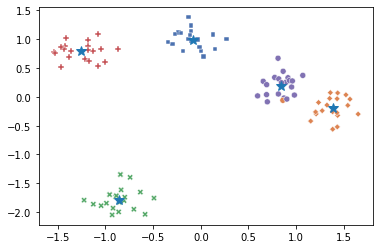

In [63]:
# Visualize 
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=y_train,
                style=centroid_idxs,
                palette='deep',
                legend=None)
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '*',
         markersize=10)
plt.show()

## References
- https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670
